<a href="https://colab.research.google.com/github/BilalAsifB/Learning-PyTorch/blob/main/notebooks/02_pytorch_NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(torch.__version__)

2.9.0+cpu


In [2]:
!pip install torchmetrics --quiet

In [3]:
from torchmetrics import Accuracy

In [4]:
RANDOM_SEED = 42
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
import sklearn
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split

In [6]:
n_samples = 1000
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=RANDOM_SEED)

In [7]:
circles = pd.DataFrame({'X1': x[:, 0],
                       'X2': x[:, 1],
                       'label': y})

In [8]:
circles[:11]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


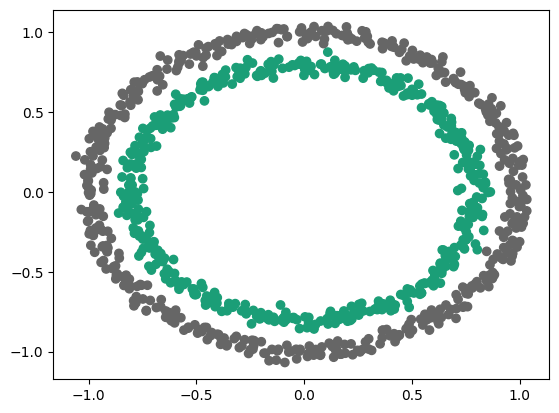

In [9]:
plt.scatter(x=circles['X1'],
            y=circles['X2'],
            c=y,
            cmap=plt.cm.Dark2_r)
plt.show()

In [10]:
x.ndim, x.shape

(2, (1000, 2))

In [11]:
y.ndim, y.shape

(1, (1000,))

In [12]:
x = torch.from_numpy(x).type(torch.float).to(DEVICE)
y = torch.from_numpy(y).type(torch.float).to(DEVICE)

x.dtype, y.dtype

(torch.float32, torch.float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

In [14]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [15]:
class CircleClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=X_train.shape[1],
                                 out_features=3)
        self.layer_2 = nn.Linear(in_features=3,
                                 out_features=y_train.ndim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x))

In [16]:
model = CircleClassificationModel().to(DEVICE)

In [17]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5614,  0.5100],
                      [-0.4290, -0.4697],
                      [ 0.1810, -0.3522]])),
             ('layer_1.bias', tensor([-0.3745, -0.2452,  0.4663])),
             ('layer_2.weight', tensor([[-0.5037,  0.3823,  0.3504]])),
             ('layer_2.bias', tensor([-0.0943]))])

In [18]:
# Easier way to make a simple sequential model
model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1],
              out_features=3),
    nn.Linear(in_features=3,
              out_features=y_train.ndim),
).to(DEVICE)

In [19]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1907, -0.5944],
                      [ 0.0771, -0.6979],
                      [ 0.1861,  0.2662]])),
             ('0.bias', tensor([ 0.2316, -0.6386,  0.5635])),
             ('1.weight', tensor([[-0.1544,  0.2968, -0.0672]])),
             ('1.bias', tensor([0.1294]))])

In [20]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)

In [21]:
torch.manual_seed(RANDOM_SEED)
epochs = 200

for epoch in range(epochs + 1):
    model.train()
    train_logits = model(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))
    train_loss = loss_fn(train_logits, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)

    if epoch % 10 == 0:
        print(f'~ Epoch: {epoch}:\nTraining loss: {train_loss:.6} | Testing_loss: {test_loss:.6}')

~ Epoch: 0:
Training loss: 0.696926 | Testing_loss: 0.694143
~ Epoch: 10:
Training loss: 0.69583 | Testing_loss: 0.693488
~ Epoch: 20:
Training loss: 0.694959 | Testing_loss: 0.69307
~ Epoch: 30:
Training loss: 0.694306 | Testing_loss: 0.692872
~ Epoch: 40:
Training loss: 0.693844 | Testing_loss: 0.692851
~ Epoch: 50:
Training loss: 0.693531 | Testing_loss: 0.692955
~ Epoch: 60:
Training loss: 0.693327 | Testing_loss: 0.693133
~ Epoch: 70:
Training loss: 0.693197 | Testing_loss: 0.693345
~ Epoch: 80:
Training loss: 0.693114 | Testing_loss: 0.693564
~ Epoch: 90:
Training loss: 0.693062 | Testing_loss: 0.693771
~ Epoch: 100:
Training loss: 0.693029 | Testing_loss: 0.693958
~ Epoch: 110:
Training loss: 0.693008 | Testing_loss: 0.694121
~ Epoch: 120:
Training loss: 0.692995 | Testing_loss: 0.694258
~ Epoch: 130:
Training loss: 0.692988 | Testing_loss: 0.694371
~ Epoch: 140:
Training loss: 0.692984 | Testing_loss: 0.69446
~ Epoch: 150:
Training loss: 0.692982 | Testing_loss: 0.694529
~ Epoc

In [22]:
import requests
from pathlib import Path

if not Path('helper_functions.py').is_file():
    request =  requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

In [23]:
from helper_functions import plot_predictions, plot_decision_boundary

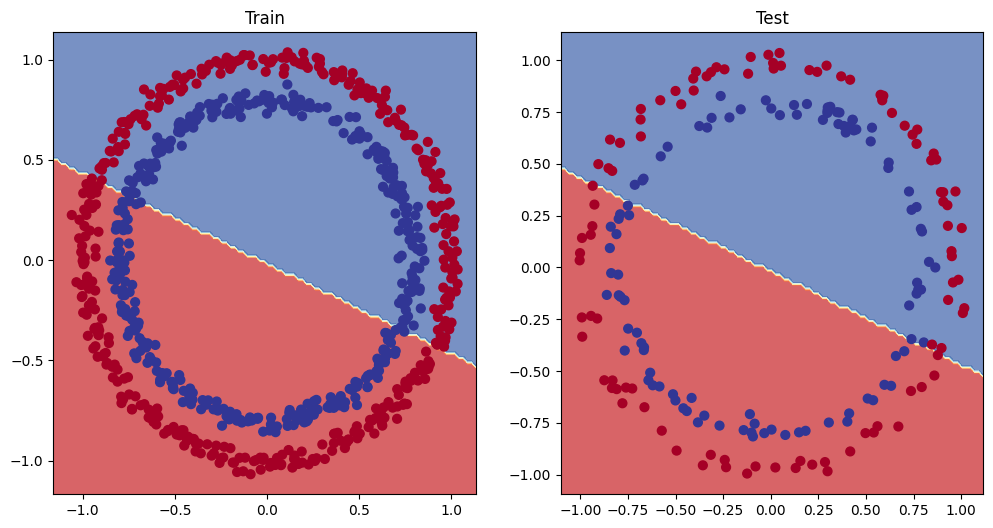

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

In [25]:
improved_model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1],
              out_features=16),
    nn.Linear(in_features=16,
              out_features=8),
    nn.Linear(in_features=8,
              out_features=y_train.ndim),
).to(DEVICE)

In [26]:
improved_model

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [27]:
def train_test_loop(X_train, X_test, y_train, y_test,
                    model, epochs=200, lr=0.001, is_multiclass=False):
    torch.manual_seed(RANDOM_SEED)
    torch.cuda.manual_seed(RANDOM_SEED)

    loss_fn = nn.BCEWithLogitsLoss() if not is_multiclass else nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=lr)

    if is_multiclass: accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(DEVICE)
    else: accuracy = Accuracy(task='binary').to(DEVICE)

    train_losses = []
    test_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs + 1):
        model.train()
        train_logits = model(X_train).squeeze()
        if is_multiclass:
            train_preds = torch.softmax(input=train_logits, dim=1)
            train_loss = loss_fn(train_logits, y_train.long())
        else:
            train_preds = torch.round(torch.sigmoid(train_logits))
            train_loss = loss_fn(train_logits, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        model.eval()
        with torch.inference_mode():
            test_logits = model(X_test).squeeze()
            if is_multiclass:
                test_preds = torch.softmax(input=test_logits, dim=1)
                test_loss = loss_fn(test_logits, y_test.long())
            else:
                test_preds = torch.round(torch.sigmoid(test_logits))
                test_loss = loss_fn(test_logits, y_test)

        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        train_accuracy.append(accuracy(train_preds, y_train.long() if is_multiclass else y_train))
        test_accuracy.append(accuracy(test_preds, y_test.long() if is_multiclass else y_test))

        if epoch % 10 == 0:
            print(f'~ Epoch: {epoch}:\nTraining loss: {train_loss:.6f} | Testing loss: {test_loss:.6f}\nTraining accuracy: {train_accuracy[-1]*100:0.2f}% | Testing accuracy: {test_accuracy[-1]*100:0.2f}%')

    return train_losses, test_losses, train_accuracy, test_accuracy

In [28]:
improved_model_train_losses, improved_model_test_losses,improved_model_train_accuracy, improved_model_test_accuracy  = train_test_loop(X_train, X_test, y_train, y_test, improved_model, 1000)

~ Epoch: 0:
Training loss: 0.700290 | Testing loss: 0.699194
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 10:
Training loss: 0.696511 | Testing loss: 0.695745
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 20:
Training loss: 0.694278 | Testing loss: 0.693881
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 30:
Training loss: 0.693318 | Testing loss: 0.693331
Training accuracy: 55.75% | Testing accuracy: 54.50%
~ Epoch: 40:
Training loss: 0.693091 | Testing loss: 0.693588
Training accuracy: 48.38% | Testing accuracy: 48.00%
~ Epoch: 50:
Training loss: 0.693032 | Testing loss: 0.694076
Training accuracy: 49.12% | Testing accuracy: 46.50%
~ Epoch: 60:
Training loss: 0.692987 | Testing loss: 0.694514
Training accuracy: 51.00% | Testing accuracy: 46.00%
~ Epoch: 70:
Training loss: 0.692981 | Testing loss: 0.694782
Training accuracy: 51.25% | Testing accuracy: 46.00%
~ Epoch: 80:
Training loss: 0.692982 | Testing loss: 0.694844
Training accuracy: 

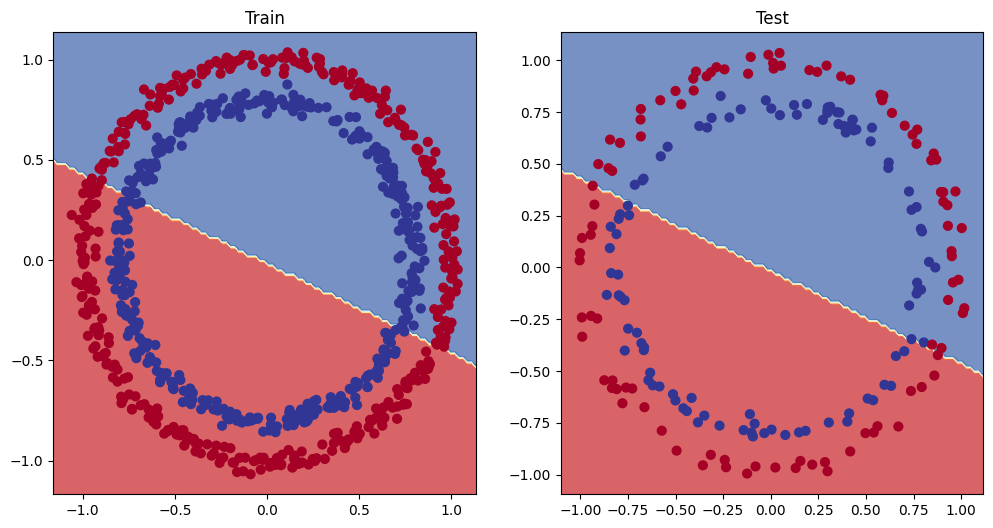

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(improved_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(improved_model, X_test, y_test)

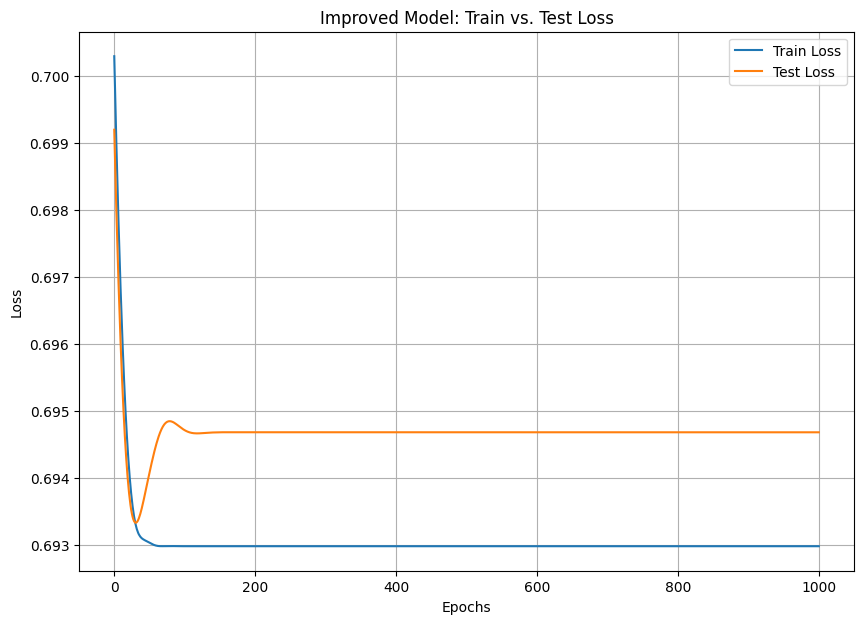

In [30]:
plt.figure(figsize=(10, 7))

plt.plot(improved_model_train_losses, label='Train Loss')
plt.plot(improved_model_test_losses, label='Test Loss')
plt.title('Improved Model: Train vs. Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

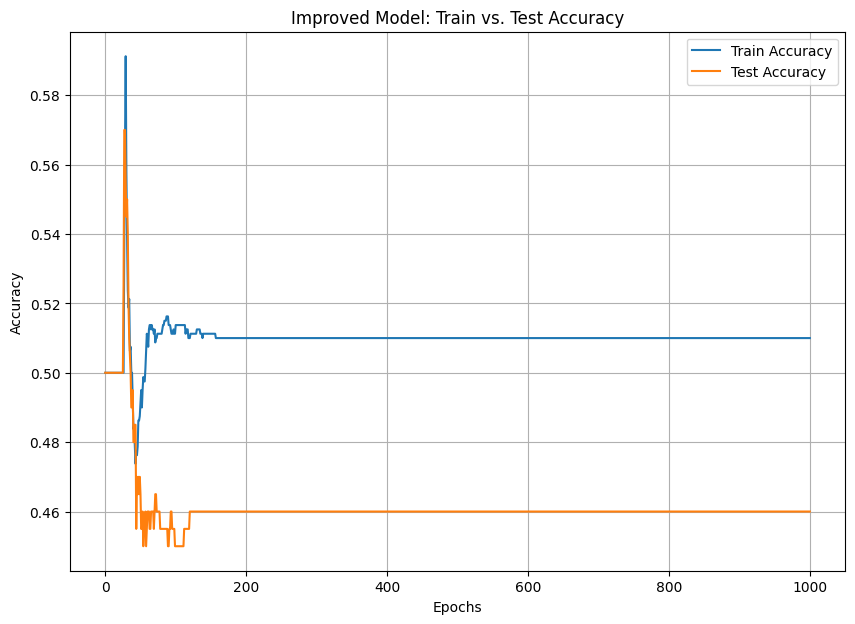

In [31]:
plt.figure(figsize=(10, 7))

plt.plot(improved_model_train_accuracy, label='Train Accuracy')
plt.plot(improved_model_test_accuracy, label='Test Accuracy')
plt.title('Improved Model: Train vs. Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

### Testing the model on a simpler problem

In [32]:
weight = 0.89
bias = 0.23

start = 0
end = 10
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

In [33]:
X_regression.to(DEVICE)
y_regression.to(DEVICE)

tensor([[0.2300],
        [0.2389],
        [0.2478],
        [0.2567],
        [0.2656],
        [0.2745],
        [0.2834],
        [0.2923],
        [0.3012],
        [0.3101],
        [0.3190],
        [0.3279],
        [0.3368],
        [0.3457],
        [0.3546],
        [0.3635],
        [0.3724],
        [0.3813],
        [0.3902],
        [0.3991],
        [0.4080],
        [0.4169],
        [0.4258],
        [0.4347],
        [0.4436],
        [0.4525],
        [0.4614],
        [0.4703],
        [0.4792],
        [0.4881],
        [0.4970],
        [0.5059],
        [0.5148],
        [0.5237],
        [0.5326],
        [0.5415],
        [0.5504],
        [0.5593],
        [0.5682],
        [0.5771],
        [0.5860],
        [0.5949],
        [0.6038],
        [0.6127],
        [0.6216],
        [0.6305],
        [0.6394],
        [0.6483],
        [0.6572],
        [0.6661],
        [0.6750],
        [0.6839],
        [0.6928],
        [0.7017],
        [0.7106],
        [0

In [34]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression,
                                                    y_regression,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

In [35]:
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(800, 200, 800, 200)

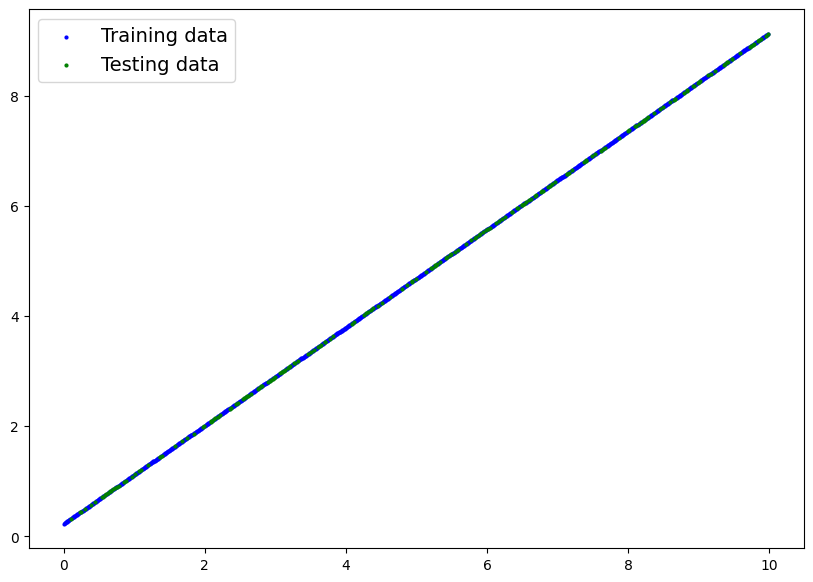

In [36]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [37]:
regression_model = nn.Sequential(
    nn.Linear(in_features=X_train_regression.shape[1],
              out_features=16),
    nn.Linear(in_features=16,
              out_features=8),
    nn.Linear(in_features=8,
              out_features=y_train_regression.shape[1]),
).to(DEVICE)

In [38]:
regression_model

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [39]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=regression_model.parameters(),
                            lr=0.001)

In [40]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 200

for epoch in range(epochs + 1):
    regression_model.train()
    train_preds = regression_model(X_train_regression)
    train_loss = loss_fn(train_preds, y_train_regression)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    regression_model.eval()
    with torch.inference_mode():
        test_preds = regression_model(X_test_regression)
        test_loss = loss_fn(test_preds, y_test_regression)

    if epoch % 10 == 0:
        print(f'~ Epoch: {epoch}:\nTraining loss: {train_loss:.6} | Testing_loss: {test_loss:.6}')

~ Epoch: 0:
Training loss: 5.60546 | Testing_loss: 5.62139
~ Epoch: 10:
Training loss: 4.75424 | Testing_loss: 4.75657
~ Epoch: 20:
Training loss: 3.89328 | Testing_loss: 3.87556
~ Epoch: 30:
Training loss: 2.96018 | Testing_loss: 2.91439
~ Epoch: 40:
Training loss: 1.88586 | Testing_loss: 1.80161
~ Epoch: 50:
Training loss: 0.587434 | Testing_loss: 0.450872
~ Epoch: 60:
Training loss: 0.133962 | Testing_loss: 0.0223562
~ Epoch: 70:
Training loss: 0.114205 | Testing_loss: 0.0394178
~ Epoch: 80:
Training loss: 0.0771285 | Testing_loss: 0.074854
~ Epoch: 90:
Training loss: 0.119909 | Testing_loss: 0.0348528
~ Epoch: 100:
Training loss: 0.0735171 | Testing_loss: 0.0802705
~ Epoch: 110:
Training loss: 0.10796 | Testing_loss: 0.0475353
~ Epoch: 120:
Training loss: 0.129825 | Testing_loss: 0.0255229
~ Epoch: 130:
Training loss: 0.139676 | Testing_loss: 0.0156692
~ Epoch: 140:
Training loss: 0.0791823 | Testing_loss: 0.0772185
~ Epoch: 150:
Training loss: 0.100527 | Testing_loss: 0.0562245
~ 

In [41]:
regression_model.eval()
with torch.inference_mode():
    preds = regression_model(X_test_regression)

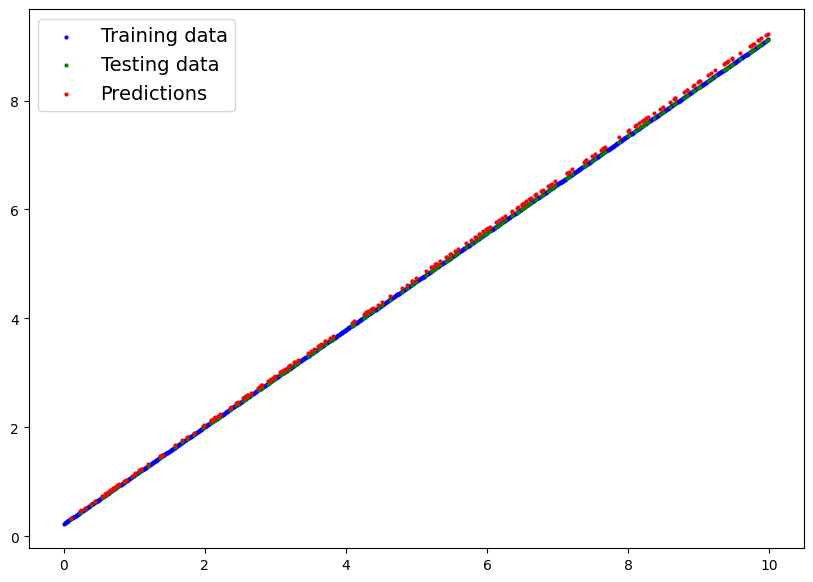

In [42]:
plot_predictions(predictions=preds,
                 train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### Adding non-linearity to the model

In [43]:
non_linear_model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1],
              out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16,
              out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8,
              out_features=y_train.ndim)
)

In [44]:
non_linear_model

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

In [45]:
non_linear_model_train_losses, non_linear_model_test_losses, non_linear_model_train_accuracy, non_linear_model_test_accuracy = train_test_loop(X_train, X_test, y_train, y_test,
                model=non_linear_model, epochs=1000)

~ Epoch: 0:
Training loss: 0.701693 | Testing loss: 0.701522
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 10:
Training loss: 0.698911 | Testing loss: 0.698881
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 20:
Training loss: 0.696805 | Testing loss: 0.696837
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 30:
Training loss: 0.694889 | Testing loss: 0.694887
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 40:
Training loss: 0.693008 | Testing loss: 0.692855
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 50:
Training loss: 0.691441 | Testing loss: 0.691138
Training accuracy: 50.00% | Testing accuracy: 50.00%
~ Epoch: 60:
Training loss: 0.689998 | Testing loss: 0.689603
Training accuracy: 56.25% | Testing accuracy: 58.00%
~ Epoch: 70:
Training loss: 0.688764 | Testing loss: 0.688322
Training accuracy: 53.75% | Testing accuracy: 57.00%
~ Epoch: 80:
Training loss: 0.687690 | Testing loss: 0.687339
Training accuracy: 

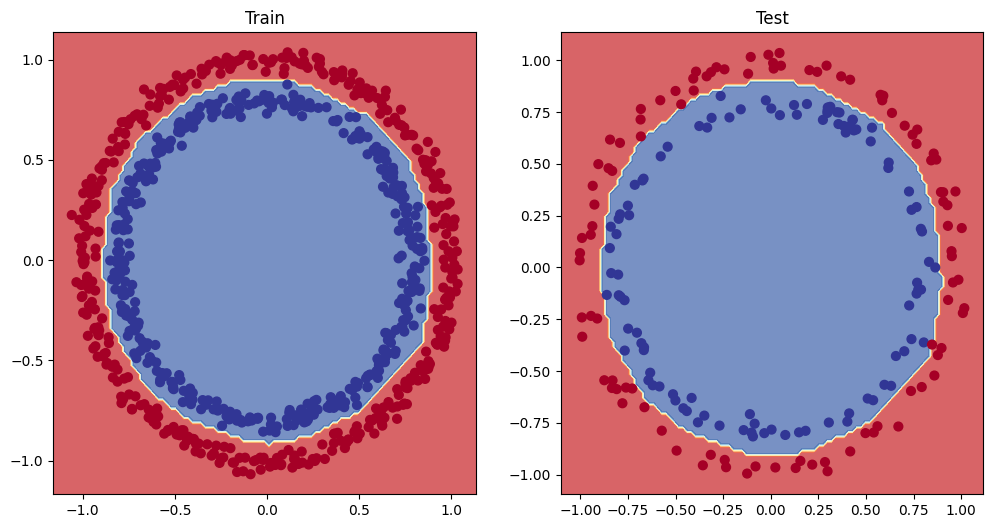

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(non_linear_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(non_linear_model, X_test, y_test)

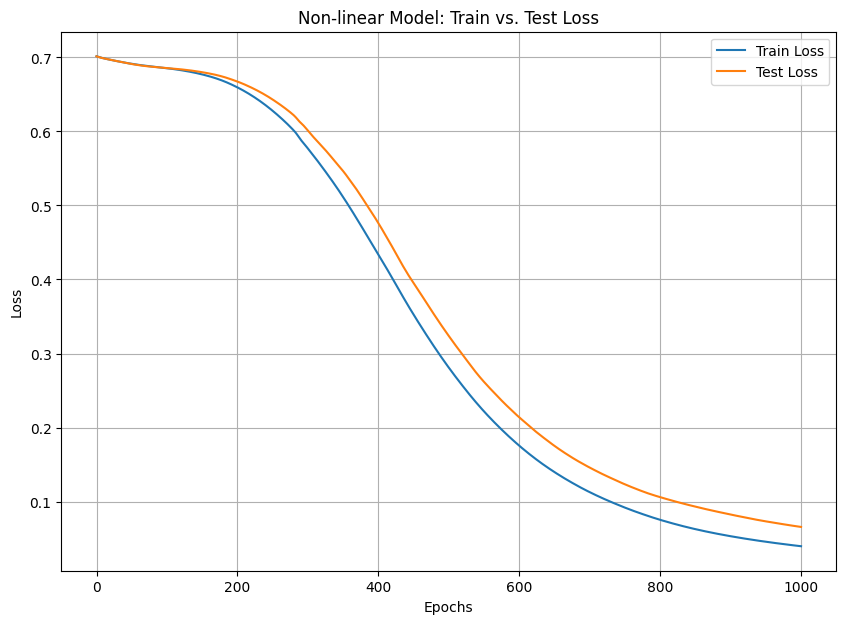

In [47]:
plt.figure(figsize=(10, 7))

plt.plot(non_linear_model_train_losses, label='Train Loss')
plt.plot(non_linear_model_test_losses, label='Test Loss')
plt.title('Non-linear Model: Train vs. Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

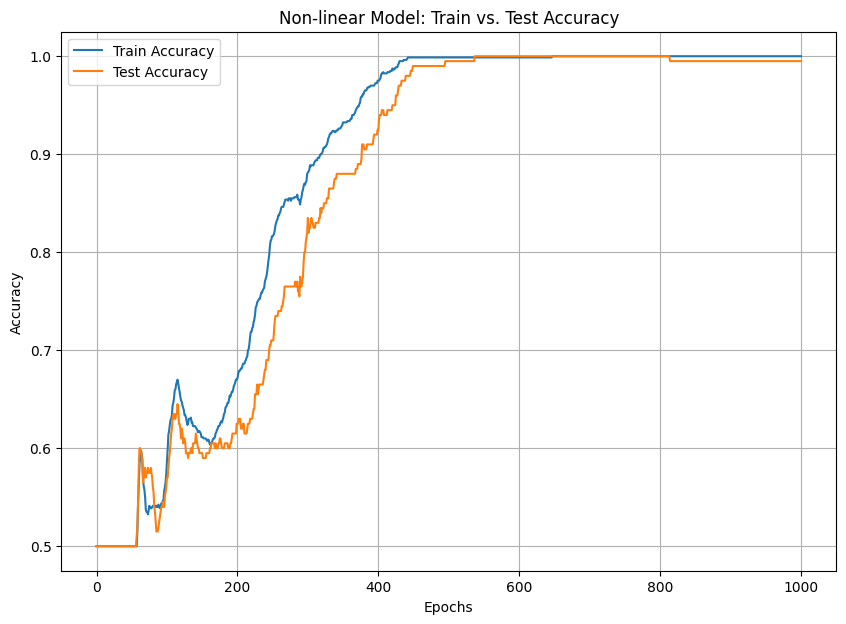

In [48]:
plt.figure(figsize=(10, 7))

plt.plot(non_linear_model_train_accuracy, label='Train Accuracy')
plt.plot(non_linear_model_test_accuracy, label='Test Accuracy')
plt.title('Non-linear Model: Train vs. Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

### Multi-class classification

In [49]:
NUM_SAMPLES = 1000
NUM_CLASSES = 4
NUM_FEATURES = 2

In [50]:
X_blob, y_blob = make_blobs(n_samples=NUM_SAMPLES,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

In [51]:
X_blob = torch.from_numpy(X_blob).type(torch.float).to(DEVICE)
y_blob = torch.from_numpy(y_blob).type(torch.float).to(DEVICE)

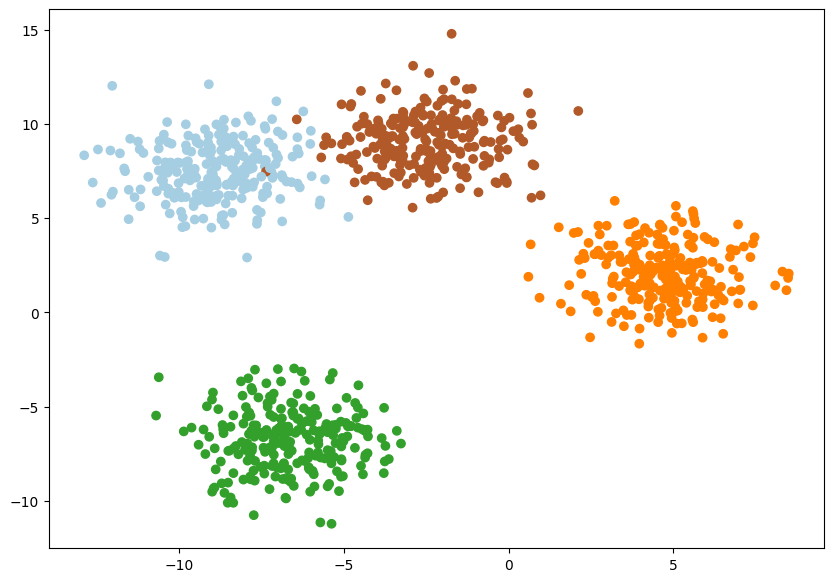

In [52]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1],
            c=y_blob, cmap=plt.cm.Paired_r)
plt.show()

In [53]:
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

In [54]:
len(X_train_blob), len(X_test_blob), len(y_train_blob), len(y_test_blob)

(800, 200, 800, 200)

In [55]:
multi_model = nn.Sequential(
    nn.Linear(in_features=NUM_FEATURES,
              out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16,
              out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8,
              out_features=NUM_CLASSES)
).to(DEVICE)

In [56]:
multi_model

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=4, bias=True)
)

In [57]:
multi_model_train_losses, multi_model_test_losses, multi_model_train_accuracy, multi_model_test_accuracy = train_test_loop(X_train_blob, X_test_blob, y_train_blob, y_test_blob,
                                                    model=multi_model, epochs=1000, is_multiclass=True)

~ Epoch: 0:
Training loss: 1.334767 | Testing loss: 1.351942
Training accuracy: 49.25% | Testing accuracy: 43.50%
~ Epoch: 10:
Training loss: 1.235996 | Testing loss: 1.259984
Training accuracy: 65.00% | Testing accuracy: 69.00%
~ Epoch: 20:
Training loss: 1.152554 | Testing loss: 1.181009
Training accuracy: 75.62% | Testing accuracy: 70.50%
~ Epoch: 30:
Training loss: 1.073825 | Testing loss: 1.107147
Training accuracy: 75.62% | Testing accuracy: 70.50%
~ Epoch: 40:
Training loss: 0.996996 | Testing loss: 1.033670
Training accuracy: 75.38% | Testing accuracy: 71.50%
~ Epoch: 50:
Training loss: 0.921426 | Testing loss: 0.960447
Training accuracy: 75.38% | Testing accuracy: 71.50%
~ Epoch: 60:
Training loss: 0.847361 | Testing loss: 0.887256
Training accuracy: 75.25% | Testing accuracy: 72.00%
~ Epoch: 70:
Training loss: 0.773105 | Testing loss: 0.812369
Training accuracy: 82.00% | Testing accuracy: 82.00%
~ Epoch: 80:
Training loss: 0.696120 | Testing loss: 0.732856
Training accuracy: 

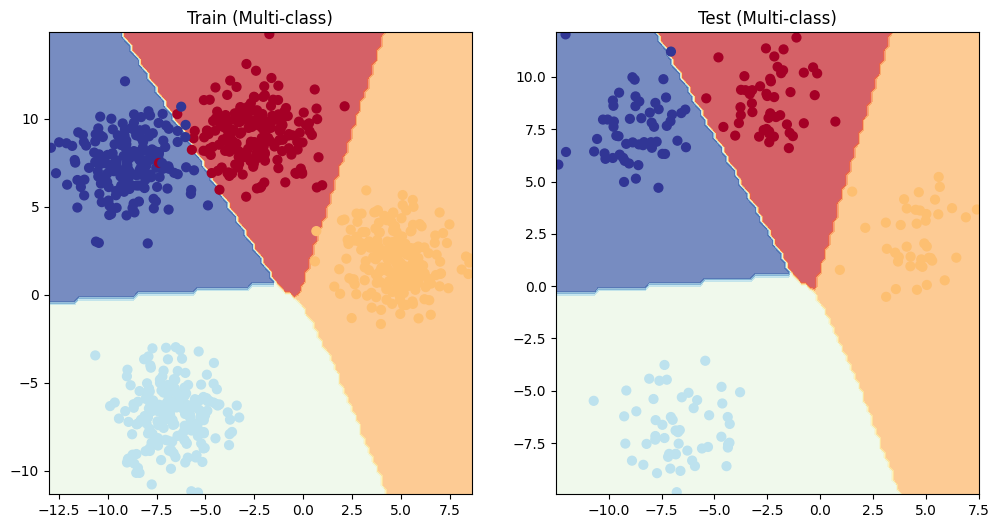

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train (Multi-class)')
plot_decision_boundary(multi_model, X_train_blob, y_train_blob)
plt.subplot(1, 2, 2)
plt.title('Test (Multi-class)')
plot_decision_boundary(multi_model, X_test_blob, y_test_blob)
plt.show()

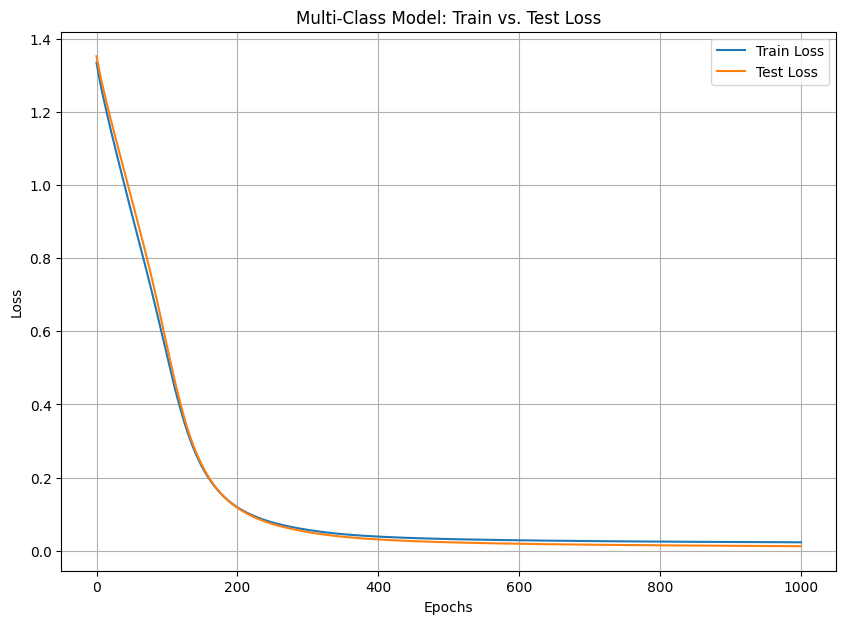

In [59]:
plt.figure(figsize=(10, 7))

plt.plot(multi_model_train_losses, label='Train Loss')
plt.plot(multi_model_test_losses, label='Test Loss')
plt.title('Multi-Class Model: Train vs. Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

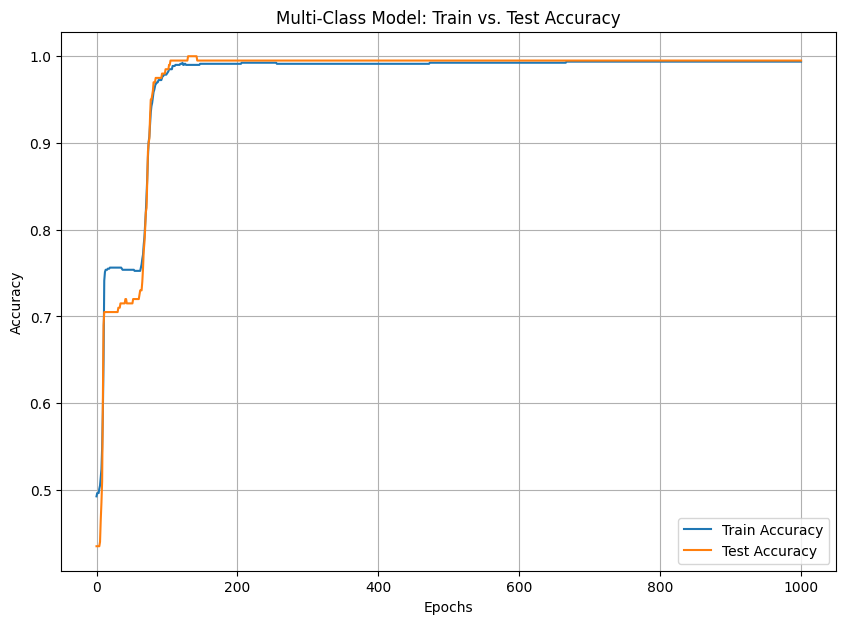

In [60]:
plt.figure(figsize=(10, 7))

plt.plot(multi_model_train_accuracy, label='Train Accuracy')
plt.plot(multi_model_test_accuracy, label='Test Accuracy')
plt.title('Multi-Class Model: Train vs. Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()